# Lab 1 Pandas optimization

#### 1. Pick your own dataset.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
file_path = "/Users/user/Головна/Університет/Навчання/Big Data analytics : Applied Data analytics/Big-Data-analytics-Applied-Data-analytics/datasets/movies_dataset.csv"

df = pd.read_csv(file_path)

In [28]:
df

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor
0,1,Might toward capital,Comedy,2003,28-09-2003,China,6577427.79,6613685.82,15472035.66,1778530.85,3034053.32,6.2,58,7865,10596,Kristina Moore,Brian Mccormick
1,2,He however experience,Comedy,1988,14-02-1988,USA,1883810.10,1930949.15,3637731.12,247115.74,831828.84,5.2,44,1708,220,Benjamin Hudson,Ashley Pena
2,3,Star responsibility politics,Comedy,1971,02-11-1971,USA,2468079.29,4186694.69,7165111.24,878453.95,2171405.93,5.5,55,4678,7805,Kayla Young,Alexander Haley
3,4,Exactly live,Comedy,1998,06-08-1998,USA,1447311.46,2023683.92,4373820.26,570657.72,898886.01,7.3,87,2467,1751,Michael Ross,Patrick Barnett
4,5,Focus improve especially,Documentary,2021,17-12-2021,India,900915.86,2129629.10,3113017.38,361189.37,861775.91,6.1,67,5555,697,Faith Franklin,Duane Fletcher DDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,999995,He anyone,Action,2011,14-09-2011,China,648176.38,1075869.51,2624306.41,170212.67,614079.92,4.8,58,12664,586,Nathan Bolton,Stephanie Moore
999995,999996,Single yourself sister collection,Horror,1982,27-08-1982,USA,657167.15,1046949.86,2164587.12,119899.27,564950.72,7.3,83,622,2327,David Lee,Tracy Klein
999996,999997,Old economic,Documentary,1993,12-02-1993,USA,29914685.15,30619499.73,57774787.73,6331667.63,18136941.88,4.1,32,100,1394,Jeremy Davis,Lynn Pierce
999997,999998,My itself and leave,Horror,2013,11-11-2013,India,1382498.55,3168114.87,5567631.38,438945.44,1703606.02,4.3,23,2337,105,Melanie Olson,Melissa Mcgee


In [39]:
df.shape

(999999, 17)

In [29]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MovieID               999999 non-null  int64  
 1   Title                 999999 non-null  object 
 2   Genre                 999999 non-null  object 
 3   ReleaseYear           999999 non-null  int64  
 4   ReleaseDate           999999 non-null  object 
 5   Country               999999 non-null  object 
 6   BudgetUSD             999999 non-null  float64
 7   US_BoxOfficeUSD       999999 non-null  float64
 8   Global_BoxOfficeUSD   999999 non-null  float64
 9   Opening_Day_SalesUSD  999999 non-null  float64
 10  One_Week_SalesUSD     999999 non-null  float64
 11  IMDbRating            999999 non-null  float64
 12  RottenTomatoesScore   999999 non-null  int64  
 13  NumVotesIMDb          999999 non-null  int64  
 14  NumVotesRT            999999 non-null  int64  
 15  

In [30]:
for dtype in ['float','int','object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 6.54 MB
Average memory usage for int columns: 6.36 MB
Average memory usage for object columns: 55.10 MB


In [31]:
import numpy as np
int_types = ["uint8", "int8", "int16", "int32", "int64"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



#### 2. Use Dora library installed in Applied lab1 for data cleaning.

In [38]:
df.isna().sum()

MovieID                 0
Title                   0
Genre                   0
ReleaseYear             0
ReleaseDate             0
Country                 0
BudgetUSD               0
US_BoxOfficeUSD         0
Global_BoxOfficeUSD     0
Opening_Day_SalesUSD    0
One_Week_SalesUSD       0
IMDbRating              0
RottenTomatoesScore     0
NumVotesIMDb            0
NumVotesRT              0
Director                0
LeadActor               0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

#### 3. Perform numerical and object types conversions aimed at minimizing storage space, as outlined above.

In [41]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else:
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2
    return "{:03.2f} MB".format(usage_mb)

In [42]:
mem_usage(df)

'469.61 MB'

Optimization of `int`

In [64]:
df_int = df.select_dtypes(include=['int'])
df_int

,MovieID,ReleaseYear,RottenTomatoesScore,NumVotesIMDb,NumVotesRT
0,1,2003,58,7865,10596
1,2,1988,44,1708,220
2,3,1971,55,4678,7805
3,4,1998,87,2467,1751
4,5,2021,67,5555,697
...,...,...,...,...,...
999994,999995,2011,58,12664,586
999995,999996,1982,83,622,2327
999996,999997,1993,32,100,1394
999997,999998,2013,23,2337,105


In [65]:
converted_int = df_int.apply(pd.to_numeric, downcast='unsigned')
converted_int

,MovieID,ReleaseYear,RottenTomatoesScore,NumVotesIMDb,NumVotesRT
0,1,2003,58,7865,10596
1,2,1988,44,1708,220
2,3,1971,55,4678,7805
3,4,1998,87,2467,1751
4,5,2021,67,5555,697
...,...,...,...,...,...
999994,999995,2011,58,12664,586
999995,999996,1982,83,622,2327
999996,999997,1993,32,100,1394
999997,999998,2013,23,2337,105


In [48]:
print("Ints Before: ", mem_usage(df_int))
print("Ints After:  ", mem_usage(converted_int))

Ints Before:  38.15 MB
Ints After:   14.31 MB


Optimization of `float`

In [50]:
df_float = df.select_dtypes(include=['float'])
df_float

,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating
0,6577427.79,6613685.82,15472035.66,1778530.85,3034053.32,6.2
1,1883810.10,1930949.15,3637731.12,247115.74,831828.84,5.2
2,2468079.29,4186694.69,7165111.24,878453.95,2171405.93,5.5
3,1447311.46,2023683.92,4373820.26,570657.72,898886.01,7.3
4,900915.86,2129629.10,3113017.38,361189.37,861775.91,6.1
...,...,...,...,...,...,...
999994,648176.38,1075869.51,2624306.41,170212.67,614079.92,4.8
999995,657167.15,1046949.86,2164587.12,119899.27,564950.72,7.3
999996,29914685.15,30619499.73,57774787.73,6331667.63,18136941.88,4.1
999997,1382498.55,3168114.87,5567631.38,438945.44,1703606.02,4.3


In [52]:
converted_float = df_float.apply(pd.to_numeric, downcast='float')
converted_float

,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating
0,6577427.79,6613685.82,15472035.66,1778530.85,3034053.32,6.2
1,1883810.10,1930949.15,3637731.12,247115.74,831828.84,5.2
2,2468079.29,4186694.69,7165111.24,878453.95,2171405.93,5.5
3,1447311.46,2023683.92,4373820.26,570657.72,898886.01,7.3
4,900915.86,2129629.10,3113017.38,361189.37,861775.91,6.1
...,...,...,...,...,...,...
999994,648176.38,1075869.51,2624306.41,170212.67,614079.92,4.8
999995,657167.15,1046949.86,2164587.12,119899.27,564950.72,7.3
999996,29914685.15,30619499.73,57774787.73,6331667.63,18136941.88,4.1
999997,1382498.55,3168114.87,5567631.38,438945.44,1703606.02,4.3


In [53]:
print("Floats Before: ", mem_usage(df_float))
print("Floats After:  ", mem_usage(converted_float))

Floats Before:  45.78 MB
Floats After:   41.96 MB


Optimization of `object`

In [54]:
df_obj = df.select_dtypes(include=['object'])
df_obj

,Title,Genre,ReleaseDate,Country,Director,LeadActor
0,Might toward capital,Comedy,28-09-2003,China,Kristina Moore,Brian Mccormick
1,He however experience,Comedy,14-02-1988,USA,Benjamin Hudson,Ashley Pena
2,Star responsibility politics,Comedy,02-11-1971,USA,Kayla Young,Alexander Haley
3,Exactly live,Comedy,06-08-1998,USA,Michael Ross,Patrick Barnett
4,Focus improve especially,Documentary,17-12-2021,India,Faith Franklin,Duane Fletcher DDS
...,...,...,...,...,...,...
999994,He anyone,Action,14-09-2011,China,Nathan Bolton,Stephanie Moore
999995,Single yourself sister collection,Horror,27-08-1982,USA,David Lee,Tracy Klein
999996,Old economic,Documentary,12-02-1993,USA,Jeremy Davis,Lynn Pierce
999997,My itself and leave,Horror,11-11-2013,India,Melanie Olson,Melissa Mcgee


In [56]:
converted_obj = pd.DataFrame()

In [57]:
for col in df_obj.columns:
    num_unique = df_obj[col].nunique()
    num_total = len(df_obj[col])
    if num_unique / num_total < 0.5:
        converted_obj[col] = df_obj[col].astype('category')
    else:
        converted_obj[col] = df_obj[col]

In [59]:
print("Objects Before: ", mem_usage(df_obj))
print("Objects After:  ", mem_usage(converted_obj))

Objects Before:  385.69 MB
Objects After:   13.28 MB


In [60]:
optimized_df = df.copy()
optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float
optimized_df[converted_obj.columns] = converted_obj

In [61]:
print("Before:", mem_usage(df))
print("After: ", mem_usage(optimized_df))

Before: 469.61 MB
After:  69.55 MB


#### 4. Measure performance impact and plot it via e.g. matplotlib.

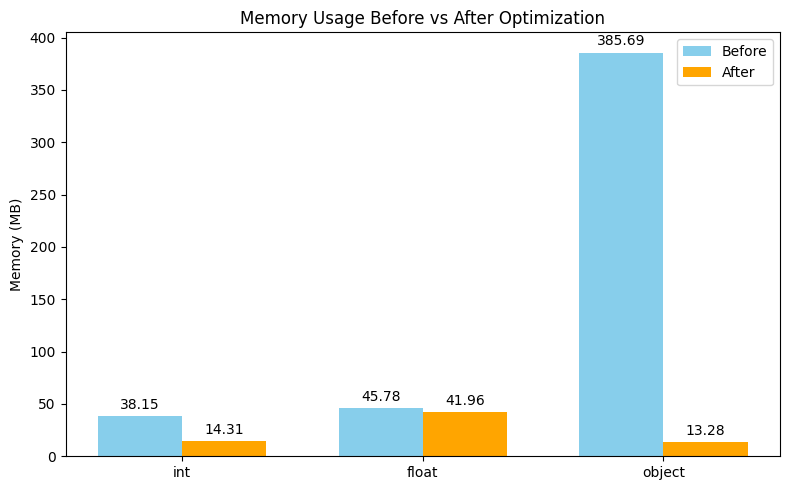

In [69]:
types = ['int', 'float', 'object']


mem_before_types = [df_int.memory_usage(deep=True).sum() / 1024**2,
                    df_float.memory_usage(deep=True).sum() / 1024**2,
                    df_obj.memory_usage(deep=True).sum() / 1024**2]

mem_after_types  = [converted_int.memory_usage(deep=True).sum() / 1024**2,
                    converted_float.memory_usage(deep=True).sum() / 1024**2,
                    converted_obj.memory_usage(deep=True).sum() / 1024**2]

x = np.arange(len(types))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, mem_before_types, width, label='Before', color='skyblue')
rects2 = ax.bar(x + width/2, mem_after_types, width, label='After', color='orange')

ax.set_ylabel('Memory (MB)')
ax.set_title('Memory Usage Before vs After Optimization')
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.legend()

for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
